<a href="https://colab.research.google.com/github/BardRimon/Study/blob/main/Introduction_in_NLP/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80_%D0%9A%D0%BB%D1%8E%D0%BA%D0%B8%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема 4. Морфологический анализ


1. Маскировать все имена собственные в электронном письме.
2. Заменить с помощью pymorphy выбранный объект в статье википедии на другой объект (со склонением).
3. Запустить два разных морфологических анализатора на одном тексте, привести три токена, для которых автоматически определились разные леммы; расшифровать предсказанные для них морфологические теги.
4. Визуализировать на двумерном графике 100 word2vec-токенов (нужно указывать часть речи) из новостных текстов с помощью алгоритма t-SNE.




In [ ]:
! pip install pymystem3

In [ ]:
email = """
Уважаемая Эльвира Геннадьевна,

Как шеф-повар, я должен выразить свою обеспокоенность слухами о появлении плесени вблизи некоторых кухонь в корпусе 13 по адресу: Льва Толстого, 42. Обращаю ваше внимание на то, что любые продукты, обрабатываемые, приготавливаемые или потребляемые вблизи плесени, могут быть заражены и небезопасны для употребления.

Если эти сообщения найдут подтверждения, мне придется закрыть несколько столовых. Возможно распределение нагрузки на кухни в корпусах:
№9 площадь Гагарина, 99
№10 улица Южная, 10

С уважением,
Алексей Мартынов.
"""

In [ ]:
import pymystem3
import re

def  name_mask(text):

    mystem = pymystem3.Mystem()
    masked_text = ''
    analyzed = mystem.analyze(text)
    for word in analyzed:
        if 'analysis' in word and word['analysis']:
            gr = word['analysis'][0]['gr']
            if 'имя' in gr or 'фам' in gr or 'отч' in gr or 'гео' in gr:
                masked_text += '***'
            else:
                masked_text += word['text']
        else:
            masked_text += word['text']
    return masked_text
print(name_mask(email))


Уважаемая *** ***,

Как шеф-повар, я должен выразить свою обеспокоенность слухами о появлении плесени вблизи некоторых кухонь в корпусе 13 по адресу: *** ***, 42. Обращаю ваше внимание на то, что любые продукты, обрабатываемые, приготавливаемые или потребляемые вблизи плесени, могут быть заражены и небезопасны для употребления.

Если эти сообщения найдут подтверждения, мне придется закрыть несколько столовых. Возможно распределение нагрузки на кухни в корпусах:
№9 площадь ***, 99
№10 улица Южная, 10

С уважением,
*** ***.



Далее придётся использовать pymorphy

In [ ]:
# Пример входных данных (взято по ссылке из гугл диска)
orig_wikitext = """Стрекозы (лат. Odonáta) — отряд древних летающих насекомых, насчитывающий в мировой фауне свыше 6650 видов. Это относительно крупные насекомые, с подвижной головой, большими глазами, короткими щетинковидными усиками, удлинённым стройным брюшком и четырьмя прозрачными крыльями с густой сетью жилок. Стрекозы — активные специализированные хищники, которые питаются насекомыми, пойманными на лету. Представители отряда широко распространены по миру, встречаясь на всех материках, исключая Антарктиду.
Все представители отряда ведут амфибионтный образ жизни — яйца и личинки развиваются в водной среде, а имаго (взрослые) обитают на суше, освоив воздушную среду и став прекрасными летунами. Взрослые стрекозы не ограничиваются в выборе места обитания одними только берегами водоёмов и могут улетать от них на значительные расстояния, встречаясь на лугах, опушках лесов и даже в населённых пунктах. Развитие с неполным превращением: имеются стадии яйца, личинки и имаго. Личинки (их называют также нимфами или наядами) развиваются в водоёмах различных типов — главным образом в стоячих озёрах, прудах и старицах рек, а также в ручьях, реках и болотистых водоёмах, вплоть до созданных человеком прудов и канав с водой. Как и взрослые стрекозы, личинки являются хищниками. Они охотятся на водных насекомых и прочих беспозвоночных.
Стрекозы имеют большое значение для человека. Велика их роль в регуляции численности кровососущих насекомых, ряда насекомых-вредителей сельского и лесного хозяйства. В некоторых случаях личинки стрекоз могут приносить вред, например, уничтожая мальков в рыбоводных прудах либо составляя им пищевую конкуренцию. Кроме того, личинки некоторых видов могут являться промежуточными хозяевами гельминтов."""

# Пример выходных данных
result_wikitext = """Годзиллы (лат. Odonáta) — отряд древних летающих насекомых, насчитывающий в мировой фауне свыше 6650 видов. Это относительно крупные насекомые, с подвижной головой, большими глазами, короткими щетинковидными усиками, удлинённым стройным брюшком и четырьмя прозрачными крыльями с густой сетью жилок. Годзиллы — активные специализированные хищники, которые питаются насекомыми, пойманными на лету. Представители отряда широко распространены по миру, встречаясь на всех материках, исключая антарктиду.
Все представители отряда ведут амфибионтный образ жизни — яйца и личинки развиваются в водной среде, а имаго (взрослые) обитают на суше, освоив воздушную среду и став прекрасными летунами. Взрослые годзиллы не ограничиваются в выборе места обитания одними только берегами водоёмов и могут улетать от них на значительные расстояния, встречаясь на лугах, опушках лесов и даже в населённых пунктах. Развитие с неполным превращением: имеются стадии яйца, личинки и имаго. Личинки (их называют также нимфами или наядами) развиваются в водоёмах различных типов — главным образом в стоячих озёрах, прудах и старицах рек, а также в ручьях, реках и болотистых водоёмах, вплоть до созданных человеком прудов и канав с водой. Как и взрослые годзиллы, личинки являются хищниками. Они охотятся на водных насекомых и прочих беспозвоночных.
Годзиллы имеют большое значение для человека. Велика их роль в регуляции численности кровососущих насекомых, ряда насекомых- вредителей сельского и лесного хозяйства. В некоторых случаях личинки годзилл могут приносить вред, например, уничтожая мальков в рыбоводных прудах либо составляя им пищевую конкуренцию. Кроме того, личинки некоторых видов могут являться промежуточными хозяевами гельминтов."""

In [ ]:
! pip install pymorphy2
! pip install pymorphy2-dicts-ru
! pip show pymorphy2
! pip install --upgrade pymorphy2 pymorphy2-dicts-ru

Name: pymorphy2
Version: 0.9.1
Summary: Morphological analyzer (POS tagger + inflection engine) for Russian language.
Home-page: https://github.com/kmike/pymorphy2/
Author: Mikhail Korobov
Author-email: kmike84@gmail.com
License: MIT license
Location: /usr/local/lib/python3.11/dist-packages
Requires: dawg-python, docopt, pymorphy2-dicts-ru
Required-by: 


In [ ]:
word1 = "Стрекозы"
word2 = "медведиф"

import pymorphy2
morph = pymorphy2.MorphAnalyzer(lang='ru')

AttributeError: module 'inspect' has no attribute 'getargspec'

Я не победил ошибку...


In [ ]:
!pip install natasha  # Установка Natasha

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.4 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26098 sha256=25871facbba97cc04af305844daa7558b8a9e48177e56edd20df8ced635dd4dc
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree


In [ ]:
from natasha import Doc, MorphVocab, Segmenter, NewsEmbedding, NewsMorphTagger, PER

segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

In [ ]:
def replace_with_declension_natasha(text, word_to_replace, replacement_word):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)

    new_text = ""
    for token in doc.tokens:
        if token.text.lower() == word_to_replace.lower():
            replacement = morph_vocab.parse(replacement_word)[0]

            try:
                replacement.inflect(token.feats)
            except KeyError: # Если возникло KeyError, просто используем начальную форму
                pass
            new_text += replacement.word + " "
        else:
            new_text += token.text + " "

    return new_text.strip()


In [ ]:
word1 = "Стрекозы"
word2 = "Трансформеры"

new_text = replace_with_declension_natasha(orig_wikitext, word1, word2)
print(new_text)

трансформеры ( лат . Odonáta ) — отряд древних летающих насекомых , насчитывающий в мировой фауне свыше 6650 видов . Это относительно крупные насекомые , с подвижной головой , большими глазами , короткими щетинковидными усиками , удлинённым стройным брюшком и четырьмя прозрачными крыльями с густой сетью жилок . трансформеры — активные специализированные хищники , которые питаются насекомыми , пойманными на лету . Представители отряда широко распространены по миру , встречаясь на всех материках , исключая Антарктиду . Все представители отряда ведут амфибионтный образ жизни — яйца и личинки развиваются в водной среде , а имаго ( взрослые ) обитают на суше , освоив воздушную среду и став прекрасными летунами . Взрослые трансформеры не ограничиваются в выборе места обитания одними только берегами водоёмов и могут улетать от них на значительные расстояния , встречаясь на лугах , опушках лесов и даже в населённых пунктах . Развитие с неполным превращением : имеются стадии яйца , личинки и им

In [ ]:
text = "бор болеть катка"
# Natasha
segmenter = Segmenter()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

doc_natasha = Doc(text)
doc_natasha.segment(segmenter)
doc_natasha.tag_morph(morph_tagger)

# Mystem
mystem = pymystem3.Mystem()
analyzed_mystem = mystem.analyze(text)

In [ ]:
def print_comparison(natasha_tokens, mystem_analysis):
  """Prints comparison of lemmas and tags for 3 tokens."""
  diff_count = 0
  natasha_index = 0

  for i, item in enumerate(mystem_analysis):

      if 'analysis' in item and item['analysis']:
          mystem_analysis_result = item['analysis'][0] # Берем первый вариант анализа
          mystem_lemma = mystem_analysis_result['lex']
          mystem_gr = mystem_analysis_result['gr']


          while natasha_index < len(natasha_tokens) and natasha_tokens[natasha_index].text != item['text']:
              natasha_index += 1

          if natasha_index < len(natasha_tokens) and natasha_tokens[natasha_index].text == item['text']:


                natasha_lemma = natasha_tokens[natasha_index].lemma
                natasha_feats = str(natasha_tokens[natasha_index].feats)
                if natasha_lemma != mystem_lemma:
                    diff_count+=1
                    print(f"Token: {item['text']}")
                    print(f"Natasha: Lemma - {natasha_lemma}, Feats - {natasha_feats}")
                    print(f"Mystem: Lemma - {mystem_lemma}, Gr - {mystem_gr}")
                    print("-" * 20)



                natasha_index += 1


          if diff_count >= 3:
              break




print_comparison(doc_natasha.tokens, analyzed_mystem)

Token: бор
Natasha: Lemma - None, Feats - {'Animacy': 'Inan', 'Case': 'Nom', 'Gender': 'Masc', 'Number': 'Sing'}
Mystem: Lemma - бор, Gr - S,муж,неод=(вин,ед|им,ед)
--------------------
Token: болеть
Natasha: Lemma - None, Feats - {'Aspect': 'Imp', 'VerbForm': 'Inf', 'Voice': 'Act'}
Mystem: Lemma - болеть, Gr - V,несов,нп=инф
--------------------
Token: катка
Natasha: Lemma - None, Feats - {'Animacy': 'Inan', 'Case': 'Gen', 'Gender': 'Masc', 'Number': 'Sing'}
Mystem: Lemma - каток, Gr - S,муж,неод=род,ед
--------------------


Задача 4 на основе текстов отобразить 100 W2V-токенов, с помощью t-SNE

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "jokes.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "konstantinalbul/russian-jokes",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())


<ipython-input-3-03b3c6b81fbd>:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:        theme                                               text  rating
0  pro-sudey  На суде в Стамбуле обвиняемый сказал:\r\n- На...       5
1  pro-sudey  - Вы продолжаете утверждать, что обвиняемый н...       4
2  pro-sudey  На суде.\r\n- Итак, когда дело дошло до столкн...       0
3  pro-sudey  Старую леди сбил автомобиль. На суде ее спраши...       4
4  pro-sudey  Судья говорит:\r\n- Согласно вашей жалобе, об...       2


In [4]:
len(df)

130204

In [5]:
! pip install gensim
! pip install stop_words

In [6]:
from stop_words import get_stop_words
import re
import string
import nltk
nltk.download('stopwords')
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import stopwords
from pymystem3 import Mystem
from tqdm import tqdm
stop_words = set(stopwords.words('russian'))
# используем функцию для очистки текста из предыдущего задания№1
def clean_func(text):
  clean_text = re.sub(r"<.*?>", "", text)
  clean_text = re.sub(r"[^\w\s-]", "", clean_text)
  clean_text = re.sub(r"[a-z]", "", clean_text)
  clean_text = re.sub(r"\s+", " ", clean_text)
  clean_text = re.sub(r"-", " ", clean_text)
  clean_text = clean_text.lower()
  return clean_text

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens



def lemmatize_text(df, model_name="ru_core_news_sm"):
    text = 'br'.join(df['clean_text'])
    nlp = spacy.load(model_name)
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]

    return "br".join(lemmas)


def lemmatize(texts):
    m = Mystem()
    merged_text = "|".join(texts)
    doc = []
    res = []
    for t in m.lemmatize(merged_text):
        if t != '|':
            doc.append(t)
        else:
            res.append(doc)
            doc = []

    return res

# Функция для поиска N-грамм
def get_top_ngrams(text, n=2, top=20):
    tokens = preprocess_text(text)
    n_grams = ngrams(tokens, n)
    return Counter(n_grams).most_common(top)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df['text_prep'] = df['text'].apply(clean_func)

In [ ]:
!pip install numpy==1.26.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 87.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.


In [ ]:
!pip install scipy==1.11.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.11.3 which is incompatible.


In [ ]:
!pip install numpy==1.24.3
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 51.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.11.3 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have nu

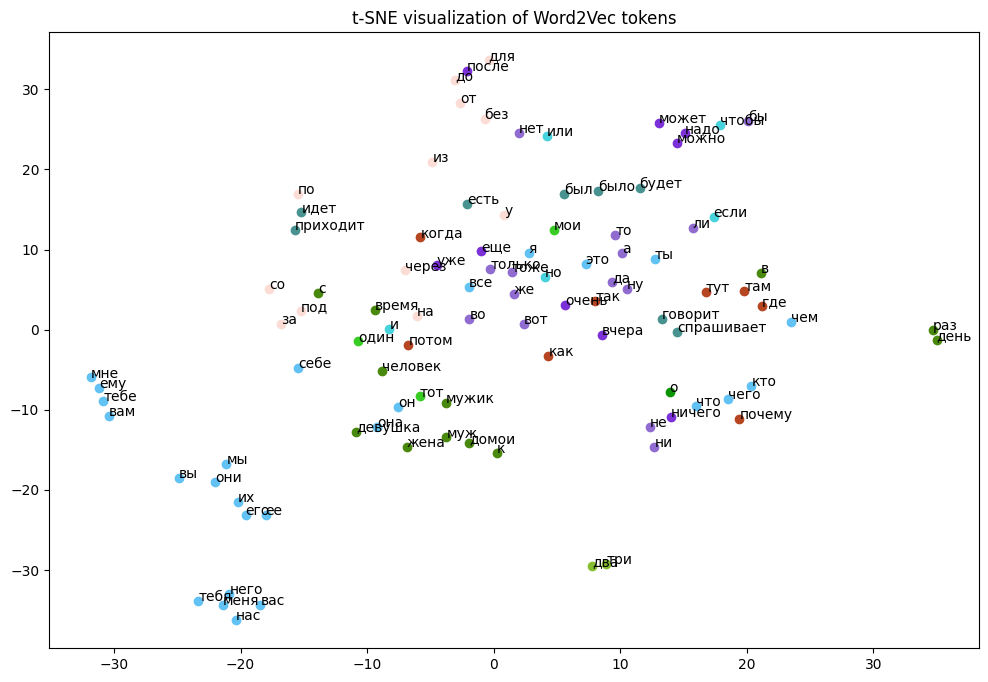

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from collections import defaultdict
from natasha import Doc, MorphVocab, Segmenter, NewsEmbedding, NewsMorphTagger, PER

jokes = df['text_prep'].tolist()


# Разбиение на токены
tokenized_jokes = [joke.split() for joke in jokes]

# Обучение Word2Vec
model = Word2Vec(sentences=tokenized_jokes, vector_size=100, window=5, min_count=5, workers=4)


# # Функция для получения части речи с помощью Natasha
# from natasha import Segmenter, NewsEmbedding, NewsMorphTagger, MorphVocab

# segmenter = Segmenter()
# morph_vocab = MorphVocab()
# emb = NewsEmbedding()
# morph_tagger = NewsMorphTagger(emb)

# def get_pos(word):
#     doc = Doc(word)
#     doc.segment(segmenter)
#     doc.tag_morph(morph_tagger)
#     if doc.tokens:
#         return doc.tokens[0].pos
#     else:
#         return None




# words = []
# pos_tags = []

# for word in model.wv.key_to_index:
#     pos = get_pos(word)
#     if pos:
#         words.append(word)
#         pos_tags.append(pos)
#     if len(words) >= 300:
#         break


m = Mystem()

def get_pos_mystem(word):
    analysis = m.analyze(word)
    if analysis and 'analysis' in analysis[0] and analysis[0]['analysis']:
        gr = analysis[0]['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0] # Извлекаем часть речи
        return pos
    else:
        return None



# Получение 100 токенов и их частей речи (с использованием pymystem3)
words = []
pos_tags = []
for word in model.wv.key_to_index:
    pos = get_pos_mystem(word)
    if pos:
        words.append(word)
        pos_tags.append(pos)
    if len(words) >= 100:
        break


# Получение векторов для выбранных токенов
vectors = np.array([model.wv[word] for word in words])


tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(vectors)


plt.figure(figsize=(12, 8))

pos_colors = defaultdict(lambda: np.random.rand(3))

for i, (x, y) in enumerate(tsne_result):
    plt.scatter(x, y, color=pos_colors[pos_tags[i]])
    plt.annotate(words[i], (x, y))

plt.title("t-SNE visualization of Word2Vec tokens")
plt.show()